In [21]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [11]:
svd_results = pd.read_csv("svd-testresults.csv")
cb_results = pd.read_csv("CB-testresults.csv")
hybrid_results = pd.read_csv("svd-testresults.csv")

In [12]:
hybrid_results = hybrid_results.drop('label',1)

In [13]:
hybrid_results["label_0.1"] = ""
hybrid_results["label_0.2"] = ""
hybrid_results["label_0.3"] = ""
hybrid_results["label_0.4"] = ""
hybrid_results["label_0.5"] = ""
hybrid_results["label_0.6"] = ""
hybrid_results["label_0.7"] = ""
hybrid_results["label_0.8"] = ""
hybrid_results["label_0.9"] = ""

In [14]:
alpha=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [15]:
svd_predictions = svd_results['label']
cb_predictions = cb_results['label']

In [17]:
for index, i in enumerate(alpha):
    n_validation_users = len(hybrid_results.index)
    for j in range(n_validation_users):
        qid_val = hybrid_results.iloc[j]['qid']
        uid_val = hybrid_results.iloc[j]['uid']
        label = 'label_0.' + str(index+1)
        hybrid_results.iloc[j, hybrid_results.columns.get_loc(label)] = (i * svd_predictions[j]) + ((1-i)*cb_predictions[j])

In [18]:
hybrid_results.to_csv("hybrid_results_svd_lr.csv")

In [19]:
n_validation_users = len(hybrid_results.index)
actual = hybrid_results['answered']
alpha_1 = hybrid_results["label_0.1"]
alpha_2 = hybrid_results["label_0.2"]
alpha_3 = hybrid_results["label_0.3"]
alpha_4 = hybrid_results["label_0.4"]
alpha_5 = hybrid_results["label_0.5"]
alpha_6 = hybrid_results["label_0.6"]
alpha_7 = hybrid_results["label_0.7"]
alpha_8 = hybrid_results["label_0.8"]
alpha_9 = hybrid_results["label_0.1"]

mae = []
mae.append(sum(abs(actual-alpha_1))/n_validation_users)
mae.append(sum(abs(actual-alpha_2))/n_validation_users)
mae.append(sum(abs(actual-alpha_3))/n_validation_users)
mae.append(sum(abs(actual-alpha_4))/n_validation_users)
mae.append(sum(abs(actual-alpha_5))/n_validation_users)
mae.append(sum(abs(actual-alpha_6))/n_validation_users)
mae.append(sum(abs(actual-alpha_7))/n_validation_users)
mae.append(sum(abs(actual-alpha_8))/n_validation_users)
mae.append(sum(abs(actual-alpha_9))/n_validation_users)

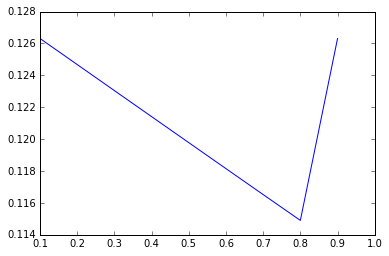

In [20]:
plt.plot(alpha, mae)
plt.show()

In [36]:
cf_results_val = pd.read_csv("./Results/user-based_results.csv")
cb_results_val = pd.read_csv("./attempt1.csv")
svd_results_val = pd.read_csv("./Results/svd-based_results.csv")

In [7]:
VAL   = './bytecup2016data/validate_nolabel.txt'
valdata = pd.read_csv(VAL)
valdata['label'] = ""

In [37]:
cf_predictions = cf_results_val['label']
cb_predictions = cb_results_val['label']
svd_predictions = svd_results_val['label']

In [9]:
n_validation_users = len(valdata.index)
for j in range(n_validation_users):
    valdata.iloc[j, valdata.columns.get_loc('label')] = (0.8 * cf_predictions[j]) + (0.2*cb_predictions[j])

In [10]:
valdata.to_csv('hybrid_results.csv')

In [25]:
hybrid_results = pd.read_csv("svd-testresults.csv")
hybrid_results = hybrid_results.drop('label',1)
hybrid_results["SVD_Based"] = svd_results.label
hybrid_results["Content_Based"] = cb_results.label

In [30]:
train_labels = hybrid_results.answered
train_data = hybrid_results.drop('answered',1).drop('qid',1).drop('uid',1)

In [31]:
regr = linear_model.LogisticRegression()
regr.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
lr_hybrid_results = pd.read_csv("./Results/svd-based_results.csv")
lr_hybrid_results = lr_hybrid_results.drop('label',1)
lr_hybrid_results["SVD_Based"] = svd_predictions
lr_hybrid_results["Content_Based"] = cb_predictions

In [48]:
test_data = lr_hybrid_results.drop('qid',1).drop('uid',1)

In [49]:
test_data

,SVD_Based,Content_Based
0,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00
2,8.171338e-03,1.922377e-01
3,0.000000e+00,0.000000e+00
4,5.151802e-01,9.968807e-01
5,1.509855e-01,1.912099e-01
6,0.000000e+00,0.000000e+00
7,0.000000e+00,0.000000e+00
8,3.840000e-37,1.062647e-168
9,1.150161e-01,2.736334e-01


In [50]:
predicted_proba = regr.predict_proba(test_data)

In [55]:
lr_hybrid_results["label"]=predicted_proba[:, 1]
lr_hybrid_results.to_csv("lr_hybrid.csv")